In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import pylab as plt
import glob
import os
from pprint import pprint
import scipy.integrate as inte
import scipy.special as special
import scipy.interpolate as interp
import scipy.signal as sig

In [3]:
import stephane.display.graphes as graphes
import stephane.tools.Smath as smath

import icewave.tools.datafolders as df
import icewave.tools.rw_data as rw_data

#import sympy #symoblic python
#import mpmath as math
#import cv2
import glob
import csv
import os

import icewave.phone.rw_pyphone as rw

macOS
laita.pmmh-local.espci.fr


In [83]:
date = '0223'
base = '/Volumes/Hublot24/Share_hublot/Data/'+date+'/'

savefolder = base+'Summary/Results/'
savefolder_local = '/Users/stephane/Documents/Articles/En_cours/BicWin2024/Summary/Results/'+date+'/'

if not os.path.exists(savefolder):
    os.makedirs(savefolder)
    #os.makedirs(savefolder_local)

In [5]:
import icewave.field.buoys as buoys
filename =  f'/Volumes/Hublot24/Share_hublot/Data/{date}/Summary/records_{date}.pkl'

records = rw_data.load_pkl(filename)
print(records.keys())
#buoys.read_buoy_data(filename)
#srtfiles_mesange = glob.glob(base+date+'/Drones/mesange/*/*.SRT')#/*/*.srt')
#srtfiles_bernache = glob.glob(base+date+'/Drones/Bernache/*/*.SRT')#/*/*.srt')
#pprint(srtfiles_mesange)

dict_keys(['drones', 'phones', 'geophones', 'buoys', 'gps'])


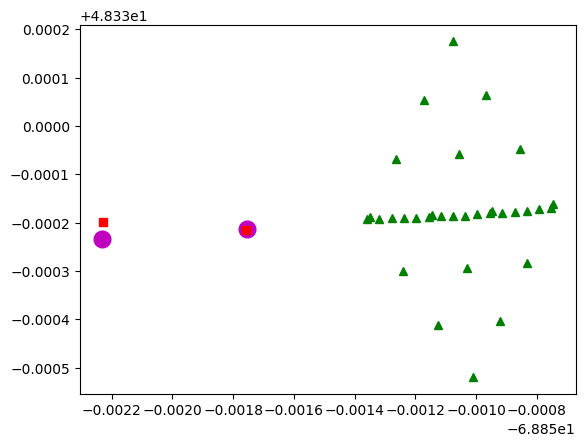

In [6]:
couples = [('B1','T17'),('B2','T6')]#,('B4','T0'),('B5','T0')]

for couple in couples:
    instrument = 'buoys'
    key = couple[0]
    k = list(records[instrument][key].keys())[0]
    lat = np.mean(records[instrument][key][k]['latitude'])
    lon = np.mean(records[instrument][key][k]['longitude'])
    plt.plot(lon,lat,'mo',markersize=12)

    instrument = 'phones'
    key = couple[1]
    k = 'Bic24_S02_2024_0223'
    lat = float(records[instrument][key][k]['latitude'])
    lon = float(records[instrument][key][k]['longitude'])
    plt.plot(lon,lat,'rs')

for key in records['geophones'].keys():
    for k in records['geophones'][key].keys():
        #.keys()
        lat = np.mean(records['geophones'][key][k]['latitude'])
        lon = np.mean(records['geophones'][key][k]['longitude'])
        #pprint(lat[0])
        plt.plot(lon,lat,'g^')

In [82]:
print(base)

/Volumes/Hublot24/Share_hublot/Data/0223/Telephones/Bic24_S02_2024_0223/


['/Volumes/Hublot24/Share_hublot/Data/0223//boueeVague/B2/mat/buoy2_sbg_20240223_1700.mat', '/Volumes/Hublot24/Share_hublot/Data/0223//boueeVague/B2/mat/buoy2_sbg_20240223_1800.mat']
/Volumes/Hublot24/Share_hublot/Data/0223//boueeVague/B2/mat/buoy2_sbg_20240223_1700.mat
1708706154.0 2024-02-23 17:35:54
<KeysViewHDF5 ['ACCEL_X', 'ACCEL_Y', 'ACCEL_Z', 'CRC', 'CRC_CALC', 'DATA_VEL_X', 'DATA_VEL_Y', 'DATA_VEL_Z', 'DELTA_ANGLE_X', 'DELTA_ANGLE_Y', 'DELTA_ANGLE_Z', 'GYRO_X', 'GYRO_Y', 'GYRO_Z', 'IMU_STATUS', 'TEMP', 'TIME_STAMP', 'TS_fix', 't', 'time']>
/Volumes/Hublot24/Share_hublot/Data/0223//boueeVague/B2/mat/buoy2_sbg_20240223_1800.mat
1708706154.0 2024-02-23 17:35:54
<KeysViewHDF5 ['ACCEL_X', 'ACCEL_Y', 'ACCEL_Z', 'CRC', 'CRC_CALC', 'DATA_VEL_X', 'DATA_VEL_Y', 'DATA_VEL_Z', 'DELTA_ANGLE_X', 'DELTA_ANGLE_Y', 'DELTA_ANGLE_Z', 'GYRO_X', 'GYRO_Y', 'GYRO_Z', 'IMU_STATUS', 'TEMP', 'TIME_STAMP', 'TS_fix', 't', 'time']>
0


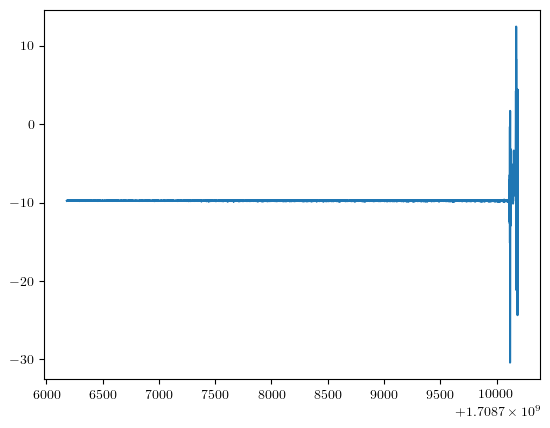

In [169]:
filenames = glob.glob(base+'/boueeVague/B2/mat/*.mat')
#filename = base+'/boueeVague/B2/mat/buoy2_sbg_20240223_1800.mat'

print(filenames)
t = []
az = []
ay = []
ax = []

buoy_sig = {}
buoy_sig['t']=[]

var = 'a'
coords = ['X','Y','Z']
for coord in coords:
    buoy_sig[var+coord]=[]

for i,filename in enumerate(filenames):
    data_buoy = buoys.read_buoy_data(filename)
    if i==0:
        tbuoys,ts = buoys.get_time(data_buoy)
    print(tbuoys,ts)

    print(data_buoy['IMU']['IMU_DATA'].keys())
    buoy_sig['t']= buoy_sig['t']+list(data_buoy['IMU']['IMU_DATA']['TIME_STAMP'][0])
    for coord in coords:
        buoy_sig[var+coord]=buoy_sig[var+coord]+list(data_buoy['IMU']['IMU_DATA']['ACCEL_'+coord][0])

        
for key in buoy_sig.keys():
    buoy_sig[key] = np.asarray(buoy_sig[key])

buoy_sig['t']=buoy_sig['t']*10**(-6)

#print(len(buoy_sig['t']))
#print(t[:10],az[:10])
#print(az[:10])
i1 = 10**5
print(len(az))
plt.plot(buoy_sig['t']+tbuoys,buoy_sig['aZ'])
#srtfiles_mesange = glob.glob(base+date+'/Drones/mesange/*/*.SRT')#/*/*.srt')
#srtfiles_bernache = glob.glob(base+date+'/Drones/Bernache/*/*.SRT')#/*/*.srt')
#pprint(srtfiles_mesange)

In [87]:
print(np.diff(t))

[20000. 20000. 20000. ... 20000. 20000. 20000.]


In [161]:
data_f['time']

{'event_START': 'START',
 'experi_START': '0.000000000E0',
 'system_START': '2024-02-23 18:47:12.592 UTC+01:00',
 'event_PAUSE': 'PAUSE',
 'experi_PAUSE': '3.364112674E3',
 'system_PAUSE': '2024-02-23 19:43:16.705 UTC+01:00'}

In [150]:
tphone,ts = phone.get_time(data_f['time']['system_START'])

AttributeError: attribute 'hour' of 'datetime.datetime' objects is not writable

In [159]:
import icewave.field.phone as phone
tphone = phone.get_time_utc(data_f['time']['system_START'])
print(tphone)

1708706832.592


Duration of recording : 2500.6
[9.76500034 9.76695061 9.76695061 9.75495052 9.75495052 9.76005077
 9.75300026 9.75105    9.75795078 9.74805069]


(9.6, 10.0)

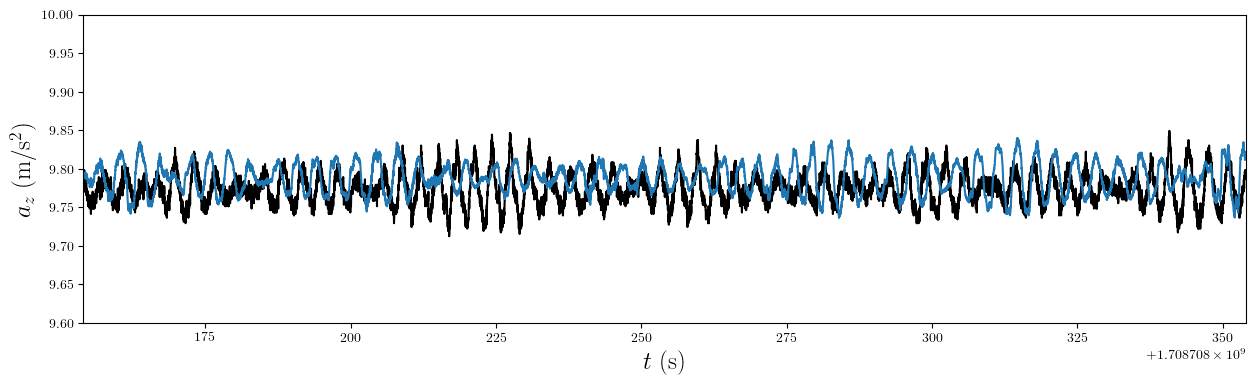

In [178]:
#data = analyse.find_measure_interval(data,var='a',Dt=5,S0=1,display=False)
data_f = analyse.cut(data,v='a')
fig,ax = plt.subplots(figsize=(15,4))
ax.plot(data_f['ta']+tphone,data_f['az'],'k')



#    plt.ylim([9.5,10.2])
figs = graphes.legende('$t$ (s)','$a_z$ (m/s$^2$)','')#ax=axs[i])


[b,a] = sig.butter(6,0.1,'low')
az_f =  sig.filtfilt(b,a,data_f['az'])

'#F4AD3C'
#ax.plot(data_f['ta'],az_f,color=(244/256,73/256,60/256))
   
print(data_f['az'][:10])

plt.plot(buoy_sig['t']+tbuoys,-buoy_sig['aZ'])

#plt.xlim([tbuoys-400,tbuoys+500])

ax.set_xlim([2000+tbuoys,2200+tbuoys])
ax.set_ylim([9.6,10.0])
#ticks = np.linspace(9.4,10.2,5)
#ax.set_yticks(ticks)
#fig.subplots_adjust(hspace=0)
#graphes.save_figs(figs,savedir=savefolder,prefix='unsync_0223_front',overwrite=True)

In [180]:
print(np.mean(np.diff(buoy_sig['t'])))
print(np.mean(np.diff(data_f['ta'])))

0.019999975038939254
0.01977089783918406


-27635


(35000.0, 45000.0)

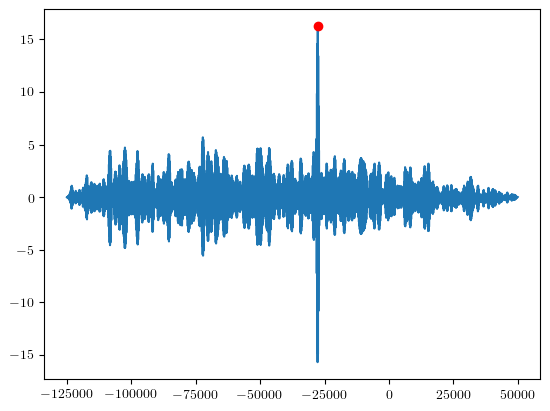

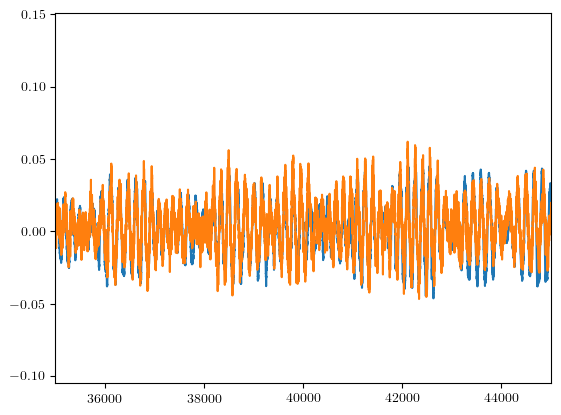

In [287]:
import scipy.signal as sig
import scipy.interpolate as interp

t1 = buoy_sig['t']+tbuoys
y1 = buoy_sig['aZ']

i0 = 100000
i1 = 150000
tcut = i0*dt
t1 = t1[i0:i1]
y1 = y1[i0:i1]
#print(tcut)

y1  = y1-np.mean(y1)

t2 = data_f['ta']+tphone
y2 = data_f['az']
y2  = y2-np.mean(y2)

f1 = interp.interp1d(t1,y1)
f2 = interp.interp1d(t2,y2)

 
dt = 0.02
ti1 = np.arange(0,np.max(t1),dt)
ti2 = np.arange(0,np.max(t2),dt)

yi1 = f1(ti1)
yi2 = f2(ti2)

C = sig.correlate(yi1,yi2,mode="full")
lags = sig.correlation_lags(len(yi1),len(yi2), mode='full')#*dt#-tcut


plt.plot(lags,C)

i0 = np.argmax(C)
Dt = lags[i0]
#plt.xlim([-600,-520])

print(Dt)
plt.plot(lags[i0],C[i0],'ro')

i1 = np.arange(len(yi1))
i2 = np.arange(len(yi2))


#/len(buoy_sig['aZ'])
plt.figure()
plt.plot(ti1[i1],yi1)
plt.plot(ti2[i2]+Dt,yi2)
plt.xlim([35000,45000])

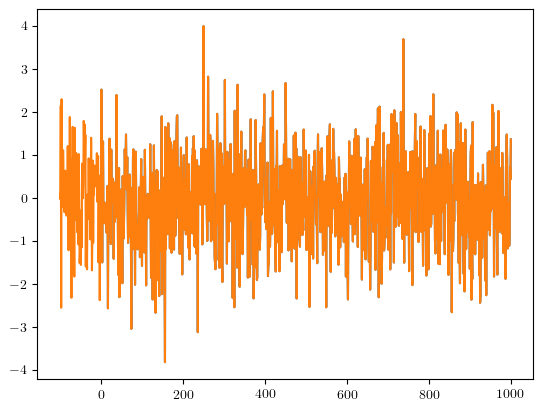

In [278]:
import numpy as np

from scipy import signal

rng = np.random.default_rng()

x = rng.standard_normal(1000)

y = np.concatenate([rng.standard_normal(100), x])

correlation = signal.correlate(x, y, mode="full")

lags = signal.correlation_lags(x.size, y.size, mode="full")

lag = lags[np.argmax(correlation)]

t1 = np.arange(len(x))
t2 = np.arange(len(y))

plt.plot(t1,x)
plt.plot(t2+lag,y)

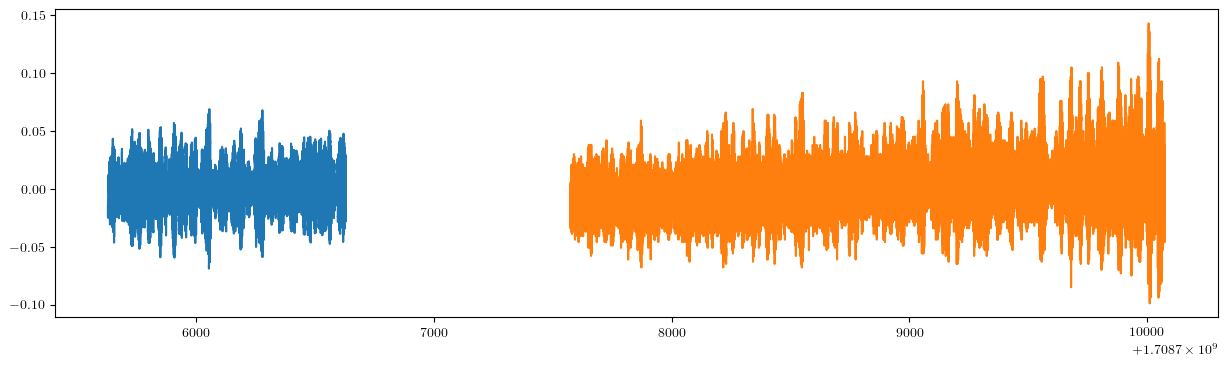

In [266]:
fig,ax = plt.subplots(figsize=(15,4))#,nrows=5,sharex=True)


plt.plot(t1+Dt,y1)
plt.plot(t2,y2)

#ax.set_xlim([2000+tbuoys,2500+tbuoys])
#ax.set_ylim([-0.5,0.5])


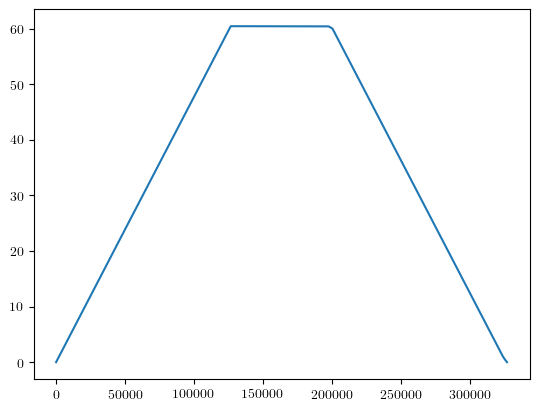

In [186]:
#plt.xlim([])

In [79]:
data_buoy['IMU']['IMU_DATA']['t']

<HDF5 dataset "t": shape (1, 77732), type "<f8">

In [73]:
print(data_buoy['IMU'].keys())
print(data_buoy['IMU']['UTC_TIME'].keys())#.keys())#.keys())

<KeysViewHDF5 ['EKF_EULER', 'EKF_NAV', 'EKF_QUAT', 'GPS1_POS', 'GPS1_VEL', 'IMU_DATA', 'MAG', 'STATUS', 'UTC_TIME', 'file_name', 'mdir', 'mname']>
<KeysViewHDF5 ['CLOCK_STATUS', 'CRC', 'CRC_CALC', 'DAY', 'GPS_TOW', 'HOUR', 'MIN', 'MONTH', 'NANOSEC', 'SEC', 'TIME_STAMP', 'TS_fix', 'YEAR', 't', 'time']>


In [10]:
date = '2024_0223'
year,day = date.split('_')

base = '/Volumes/Hublot24/Share_hublot/Data/0223/Telephones/Bic24_S02_2024_0223/'
#base = '/Users/stephane/Documents/git/icewave/icewave/field/Bicwin2024/'
#folder = base+'Data/'+year+'/'+day+'/T_00*'
folder = base +'000*'
#norme_folder = base + 'Nomenclature/'
#savefolder = base+'Data/'+year+'/'+day+'/Results'
savefolder = base + 'Results/'

if not os.path.exists(savefolder):
    os.makedirs(savefolder)
print(folder)
folderlist = glob.glob(folder)

for i,f in enumerate(folderlist):
    print(i,f)
#folder = os.path.dirname(filelist[0])

/Volumes/Hublot24/Share_hublot/Data/0223/Telephones/Bic24_S02_2024_0223/000*
0 /Volumes/Hublot24/Share_hublot/Data/0223/Telephones/Bic24_S02_2024_0223/0001_00_Accelero_Gyro_Magneto_GPS 2024-02-23 19-38-12
1 /Volumes/Hublot24/Share_hublot/Data/0223/Telephones/Bic24_S02_2024_0223/0001_04_Accelero_Gyro_Magneto_GPS 2024-02-23 19-36-09
2 /Volumes/Hublot24/Share_hublot/Data/0223/Telephones/Bic24_S02_2024_0223/0001_06_Accelero_Gyro_Magneto_GPS 2024-02-23 19-40-09
3 /Volumes/Hublot24/Share_hublot/Data/0223/Telephones/Bic24_S02_2024_0223/0001_09_Accelero_Gyro_Magneto_GPS 2024-02-23 19-41-02
4 /Volumes/Hublot24/Share_hublot/Data/0223/Telephones/Bic24_S02_2024_0223/0001_11_Accelero_Gyro_Magneto_GPS 2024-02-23 19-41-18
5 /Volumes/Hublot24/Share_hublot/Data/0223/Telephones/Bic24_S02_2024_0223/0001_13_Accelero_Gyro_Magneto_GPS 2022-04-22 06-53-13
6 /Volumes/Hublot24/Share_hublot/Data/0223/Telephones/Bic24_S02_2024_0223/0001_16_Accelero_Gyro_Magneto_GPS 2024-02-23_20-18-31
7 /Volumes/Hublot24/Share_h

In [11]:
import icewave.phone.load as load

print(folderlist[7])
data = load.load(folderlist[7])

print(data.keys())


/Volumes/Hublot24/Share_hublot/Data/0223/Telephones/Bic24_S02_2024_0223/0001_17_Accelero_Gyro_Magneto_GPS 2024-02-23_20-20-40
a
/Volumes/Hublot24/Share_hublot/Data/0223/Telephones/Bic24_S02_2024_0223/0001_17_Accelero_Gyro_Magneto_GPS 2024-02-23_20-20-40/Accelerometer.csv
g
/Volumes/Hublot24/Share_hublot/Data/0223/Telephones/Bic24_S02_2024_0223/0001_17_Accelero_Gyro_Magneto_GPS 2024-02-23_20-20-40/Gyroscope.csv
l
/Volumes/Hublot24/Share_hublot/Data/0223/Telephones/Bic24_S02_2024_0223/0001_17_Accelero_Gyro_Magneto_GPS 2024-02-23_20-20-40/Location.csv
m
/Volumes/Hublot24/Share_hublot/Data/0223/Telephones/Bic24_S02_2024_0223/0001_17_Accelero_Gyro_Magneto_GPS 2024-02-23_20-20-40/Magnetometer.csv
dict_keys(['device', 'time', 'a', 'g', 'l', 'm'])


In [12]:
data = load.sort(data)

(9.6, 10.0)

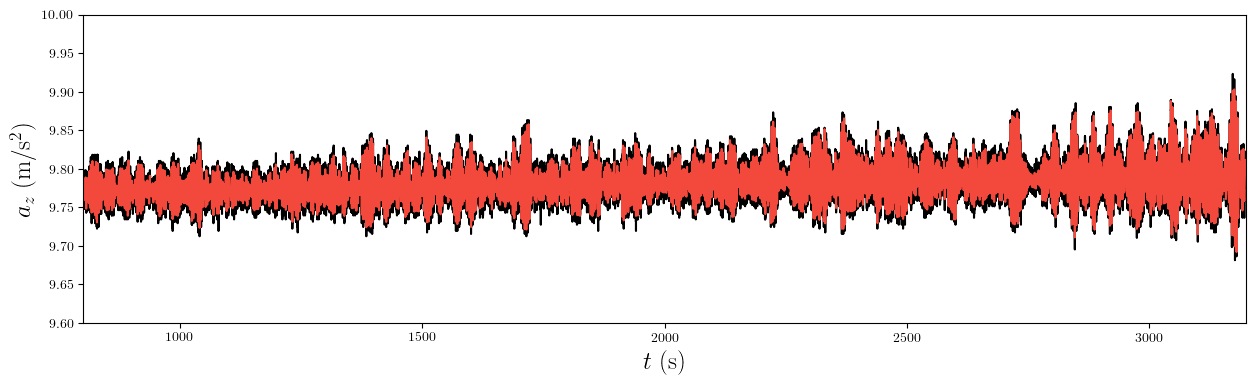

In [52]:
key = 17
fig,ax = plt.subplots(figsize=(15,4))#,nrows=5,sharex=True)
#data['a']
ax.plot(data['ta'],data['az'],'k')

#    plt.ylim([9.5,10.2])
figs = graphes.legende('$t$ (s)','$a_z$ (m/s$^2$)','')#ax=axs[i])


[b,a] = sig.butter(6,0.1,'low')
az_f =  sig.filtfilt(b,a,data['az'])

'#F4AD3C'
ax.plot(data['ta'],az_f,color=(244/256,73/256,60/256))
   
ax.set_xlim([800,3200])
ax.set_ylim([9.6,10.0])
#ticks = np.linspace(9.4,10.2,5)
#ax.set_yticks(ticks)
#fig.subplots_adjust(hspace=0)
#graphes.save_figs(figs,savedir=savefolder,prefix='unsync_0223_front',overwrite=True)

In [72]:
data_buoy['IMU']['IMU_DATA'].keys()

<KeysViewHDF5 ['ACCEL_X', 'ACCEL_Y', 'ACCEL_Z', 'CRC', 'CRC_CALC', 'DATA_VEL_X', 'DATA_VEL_Y', 'DATA_VEL_Z', 'DELTA_ANGLE_X', 'DELTA_ANGLE_Y', 'DELTA_ANGLE_Z', 'GYRO_X', 'GYRO_Y', 'GYRO_Z', 'IMU_STATUS', 'TEMP', 'TIME_STAMP', 'TS_fix', 't', 'time']>

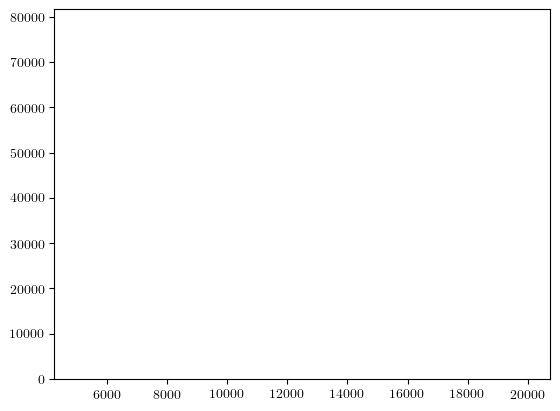

In [26]:
ax = plt.hist(np.diff(data_buoy['IMU']['IMU_DATA']['TIME_STAMP'][0]),10000)

(0.0, 1000.0)

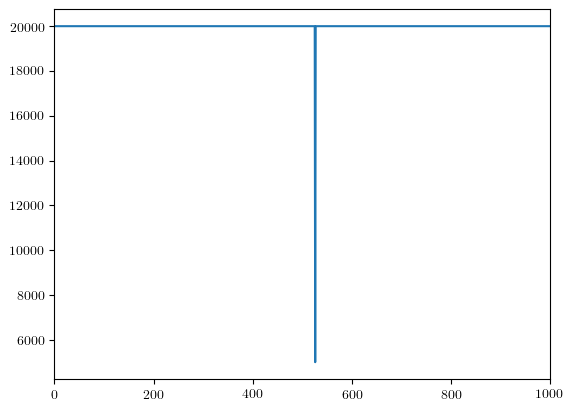

In [29]:
plt.plot(np.diff(data_buoy['IMU']['IMU_DATA']['TIME_STAMP'][0]))
plt.xlim([0,1000])

31.0928


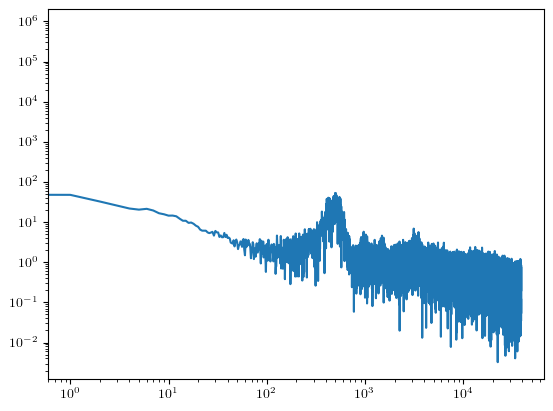

In [50]:
TF = np.fft.fft(data_buoy['IMU']['IMU_DATA']['ACCEL_Z'][0])
n = len(TF)
TF = TF[:int(n/2)]
plt.loglog(np.abs(TF))

#plt.xscale('log)
#plt.xlim([200,1000])
#plt.ylim([0.1,100])

print(n/500*0.2)

dict_keys(['time', 'device', 'gx', 'gy', 'gz', 'tg', 'ax', 'ay', 'az', 'ta', 'mx', 'my', 'mz', 'tm', 'loc', 'coords', 'ai0', 'ai1', 'at0', 'at1'])
Number of points per bin :248
Number of bins : 686


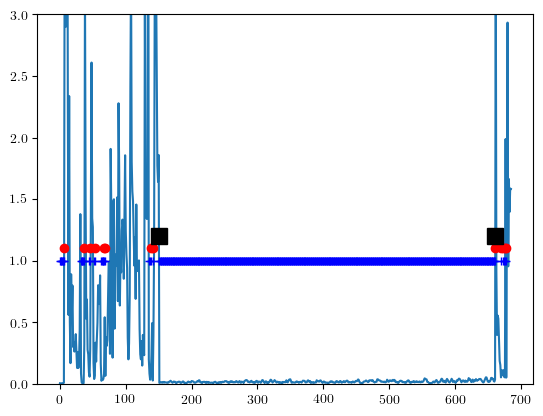

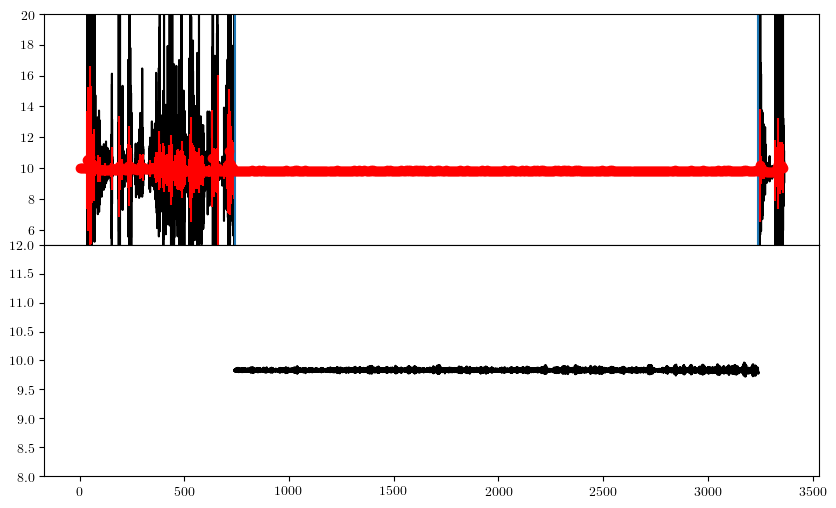

In [106]:
import icewave.phone.analyse as analyse

data_f = analyse.find_measure_interval(data,var='a',S0=0.1,display=True)#,Dt=5,S0=1,display=False):


In [91]:


plt.figure()
    
TF = np.fft.fft(data_f['az'])#'IMU']['IMU_DATA']['ACCEL_Z'][0])
n = len(TF)
TF = TF[:int(n/2)]
plt.loglog(np.abs(TF))

#plt.xscale('log)
#plt.xlim([200,1000])
#plt.ylim([100,10**4])

print(n/500*0.2)

dict_keys(['time', 'device', 'gx', 'gy', 'gz', 'tg', 'ax', 'ay', 'az', 'ta', 'mx', 'my', 'mz', 'tm', 'loc', 'coords', 'ai0', 'ai1', 'at0', 'at1'])
Number of points per bin :248
Number of bins : 686
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True

[autoreload of icewave.phone.analyse failed: Traceback (most recent call last):
  File "/usr/local/lib/python3.11/site-packages/IPython/extensions/autoreload.py", line 276, in check
    superreload(m, reload, self.old_objects)
  File "/usr/local/lib/python3.11/site-packages/IPython/extensions/autoreload.py", line 475, in superreload
    module = reload(module)
             ^^^^^^^^^^^^^^
  File "/usr/local/Cellar/python@3.11/3.11.9_1/Frameworks/Python.framework/Versions/3.11/lib/python3.11/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 621, in _exec
  File "<frozen importlib._bootstrap_external>", line 936, in exec_module
  File "<frozen importlib._bootstrap_external>", line 1074, in get_code
  File "<frozen importlib._bootstrap_external>", line 1004, in source_to_code
  File "<frozen importlib._bootstrap>", line 241, in _call_with_frames_removed
  File "/Users/stephane/Documents/git/icewave/icewave/phone/anal

IndexError: boolean index did not match indexed array along dimension 0; dimension is 542 but corresponding boolean dimension is 541

In [58]:
data.keys()

dict_keys(['time', 'device', 'gx', 'gy', 'gz', 'tg', 'ax', 'ay', 'az', 'ta', 'mx', 'my', 'mz', 'tm', 'loc', 'coords', 'ai0', 'ai1', 'at0', 'at1'])

In [ ]:

sig.correlate(yB,yT,mode='same')

B1 -68.85175305691494
B1 -68.85175164443312
B2 -68.85223142278954
B2 -68.85222264121369
B4 -68.85255580714285
B4 -68.85255306682727
48.329783851803526


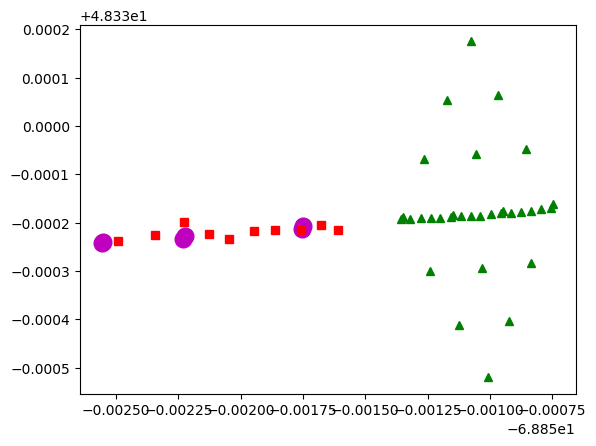

In [61]:

instrument = 'buoys'
for key in records[instrument].keys():
    if key=='B5':
        continue
    for k in records[instrument][key].keys():
        lat = np.mean(records[instrument][key][k]['latitude'])
        lon = np.mean(records[instrument][key][k]['longitude'])
        #pprint(lat[0])
        print(key,lon)

        plt.plot(lon,lat,'mo',markersize=12)


instrument = ['phones','buoys','geophones']

instrument = 'phones'
for key in records[instrument].keys():
    for k in records[instrument][key].keys():
        lat = float(records[instrument][key][k]['latitude'])
        lon = float(records[instrument][key][k]['longitude'])
        #pprint(lat[0])
        plt.plot(lon,lat,'rs')
        

#plt.plot(lon2,lat2,'rs')

print(lat)

for key in records['geophones'].keys():
    for k in records['geophones'][key].keys():
        #.keys()
        lat = np.mean(records['geophones'][key][k]['latitude'])
        lon = np.mean(records['geophones'][key][k]['longitude'])
        #pprint(lat[0])
        plt.plot(lon,lat,'g^')

#        pprint(records['geophones'][key][k]['time']) 


In [63]:
records['buoys']['B1'].keys()

dict_keys(['buoy1_sbg_20240223_1700', 'buoy1_sbg_20240223_1800'])

In [68]:
records['phones'].keys()

dict_keys(['T0', 'T4', 'T6', 'T9', 'T11', 'T13', 'T16', 'T17', 'T18', 'T19'])

In [81]:
records['buoys'].keys()

dict_keys(['B1', 'B2', 'B4', 'B5'])

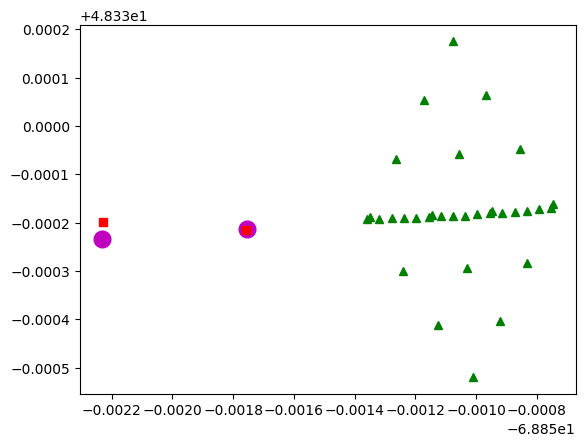